In [1]:
# import ROOT
import numpy as np
from array import array
import ctypes as cty
import matplotlib.pyplot as plt
import random as rand

from funciones_Sim_ab_initio import *
from ROOT import TMath

import multiprocessing as multi


sh: 1: root-config: not found
Error in <TUnixSystem::GetFromPipe>: command "root-config --has-dataframe" returned 32512


Welcome to JupyROOT 6.28/04


# Pruebas de Theta random

In [10]:
list_rand_tet = []
for i in np.arange(0, 30000):
    rand_thet = random_thet()
    list_rand_tet.append(rand_thet)

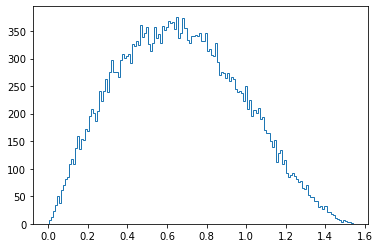

In [12]:
Bins = 150
plt.hist(list_rand_tet, bins=Bins, histtype='step')
plt.show()

# Pruebas de Energy_pri random

In [21]:
# Smith_Dull([0],[1])
# list_en_05 = []
# list_en_30 = []
list_en_60 = []

# for i in np.arange(0, 5000):
#     en = random_SD(np.radians(0.5))
#     list_en_05.append(en)
# for i in np.arange(0, 5000):
#     en = random_SD(np.radians(30))
#     list_en_30.append(en)
for i in np.arange(0, 5000):
    en = random_SD(np.radians(60))
    list_en_60.append(en)

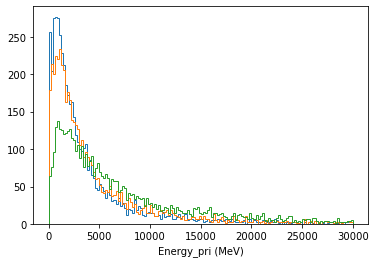

In [34]:
# print(list_en)
# print(TMath.ACos(0.999999))
# for i in np.arange(0, 100):
#     TMath.Cos(0)
Bins = 150
plt.hist(list_en_05, bins = Bins, range=(0, 30 * 10**3), histtype='step')
plt.hist(list_en_30, bins = Bins, range=(0, 30 * 10**3),  histtype='step')
plt.hist(list_en_60, bins = Bins, range=(0, 30 * 10**3),  histtype='step')
plt.xlabel('Energy_pri (MeV)')
# plt.yscale('log')
# plt.xlim(0, 10 * 10**3)
plt.show()

In [16]:
for i in np.arange(0, 1000000):
    np.cos(0)

KeyboardInterrupt: 

In [2]:
print("Number of cpu : ", multi.cpu_count())

Number of cpu :  4


# Pruebas de Edep (Landau)

In [2]:
print(TMath.Landau(1,1,1)/2)
# LV(.13,0.0725,1000) # Variables: Energy_loss, thickness (cm), momentum (MeV)

0.08942708045


In [47]:
random_LV(0.0725, 1000)

128.37795480604126

## Pruebas para crear imágenes de muones

In [3]:


# ROOT::Math::GSLRandomEngine rnd
rnd.Initialize()

const int dim = 3
double pars[dim] = {0, 0, 0.5}
double genpars[dim] = {0, 0, 0}
double cov[dim * dim] = {1.0, -0.2, 0.0, -0.2, 1.0, 0.5, 0.0, 0.5, 0.75};

TH1F* hX = new TH1F("hX", "hX;x;Counts", 100, -5, 5);
TH1F* hY = new TH1F("hY", "hY;y;Counts", 100, -5, 5);
TH1F* hZ = new TH1F("hZ", "hZ;z;Counts", 100, -5, 5);

TH2F* hXY = new TH2F("hXY", "hXY;x;y;Counts", 100, -5, 5, 100, -5, 5);
TH2F* hXZ = new TH2F("hXZ", "hXZ;x;z;Counts", 100, -5, 5, 100, -5, 5);
TH2F* hYZ = new TH2F("hYZ", "hYZ;y;z;Counts", 100, -5, 5, 100, -5, 5);

const int MAX = 10000;
for (int iEvent = 0; iEvent < MAX; ++iEvent) {
  rnd.GaussianND(dim, pars, cov, genpars);
  auto x = genpars[0];
  auto y = genpars[1];
  auto z = genpars[2];
  hX->Fill(x);
  hY->Fill(y);
  hZ->Fill(z);
  hXY->Fill(x, y);
  hXZ->Fill(x, z);
  hYZ->Fill(y, z);
}

TCanvas* c = new TCanvas("c", "Multivariate gaussian random numbers");
c->Divide(3, 2);
c->cd(1);
hX->Draw();
c->cd(2);
hY->Draw();
c->cd(3);
hZ->Draw();
c->cd(4);
hXY->Draw("COL");
c->cd(5);
hXZ->Draw("COL");
c->cd(6);
hYZ->Draw("COL");

SyntaxError: invalid syntax (731098958.py, line 6)

In [99]:

# ROOT::Math::GSLRandomEngine rnd
ROOT.Math.GSLRandomEngine().Initialize()
# print(type(ROOT.Math.GSLRandomEngine.Rndm))
rnd =  ROOT.Math.GSLRandomEngine()
dim = 3
pars= [0.0, 0.0, 0.5]
# pars = 0
genpars = [0, 0, 0]
# genpars = 0
cov = [1.0, -0.2, 0.0, -0.2, 1.0, 0.5, 0.0, 0.5, 0.75]
# cov = 1

hX = ROOT.TH1F("hX", "hX;x;Counts", 100, -5, 5)
hY = ROOT.TH1F("hY", "hY;y;Counts", 100, -5, 5)
hZ = ROOT.TH1F("hZ", "hZ;z;Counts", 100, -5, 5)

hXY = ROOT.TH2F("hXY", "hXY;x;y;Counts", 100, -5, 5, 100, -5, 5)
hXZ = ROOT.TH2F("hXZ", "hXZ;x;z;Counts", 100, -5, 5, 100, -5, 5)
hYZ = ROOT.TH2F("hYZ", "hYZ;y;z;Counts", 100, -5, 5, 100, -5, 5)

MAX = 10

for i in np.arange(0, MAX):
  # rnd.Gaussian2D(0.5, 0.5, 1, cty.c_double(10), cty.c_double(10)).Rndm
  ROOT.Math.GSLRandomEngine().GaussianND(dim, pars, cov, genpars).Rndm()
  # print(r)
  # x = genpars[0]
  # y = genpars[1]
  # z = genpars[2]
  # hX.Fill(x)
  # hY.Fill(y)
  # hZ.Fill(z)
  # hXY.Fill(x, y)
  # hXZ.Fill(x, z)
  # hYZ.Fill(y, z)

c = ROOT.TCanvas("c", "Multivariate gaussian random numbers");
c.Divide(3, 2)
c.cd(1)
hX.Draw()
c.cd(2)
hY.Draw()
c.cd(3)
hZ.Draw()
c.cd(4)
hXY.Draw("COL")
c.cd(5)
hXZ.Draw("COL")
c.cd(6)
hYZ.Draw("COL")

TypeError: void ROOT::Math::GSLRandomEngine::GaussianND(const int dim, double* pars, double* covmat, double* genpars) =>
    TypeError: could not convert argument 2 (could not convert argument to buffer or nullptr)

Warning in <TROOT::Append>: Replacing existing TH1: hX (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hY (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hZ (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hXY (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hXZ (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hYZ (Potential memory leak).


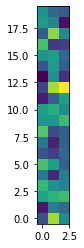

In [74]:


list_rand =[]

for i in np.arange(0, 20):
    rand = np.random.multivariate_normal([1, 1,1], [[1, 0,0],[0,1,0], [0,0,1]])
    list_rand.append(rand)

plt.imshow(list_rand, origin='lower')

In [5]:
def gaussian(x, mean, sigma):
    return np.exp(-((x - mean)**2 / (2 * sigma**2)))

def gaussian_norm(x, mean, sigma):
    return ((1)/(sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mean)**2 / (2 * sigma**2)))

def diffution_curve(z, alpha, beta):
    return np.sqrt(np.abs(alpha * np.log(1 - (beta * z))))

dict_diffuse = {'Alpha' : 7.964, 'Beta' : 2.379 * 10**(-4)}  
Alpha = dict_diffuse['Alpha']
Beta = dict_diffuse['Beta']

CCD_deep = 725 # micras
muon_deep = 725 # micras
muon_deep_px = muon_deep/15
delta_L = 1000 # micras 

delta_XY = np.sqrt(delta_L**2 - muon_deep )
delta_XY_px = delta_XY / 15

list_XY_deep = np.linspace(0, muon_deep_px, int(np.around(delta_XY_px, 0)))
# print(Alpha, Beta)
z_deeps = np.arange(7.5, CCD_deep, 7.5) # micras
sigma_values = diffution_curve(list_XY_deep * 15, Alpha, Beta) # micras

print('La lista que relaciona XY con profundiad tiene longitud: ', len(list_XY_deep))
# print(list_XY_deep * 15)

La lista que relaciona XY con profundiad tiene longitud:  67


In [12]:
anchura_max = int(np.around(sigma_values[-1] * 4 , 0))

pixels_array = np.zeros(shape = (anchura_max + 2, anchura_max + 2))
# pixels_array[0][1] =  pixels_array[0][1] + 1
# print(pixels_array[0][1])

In [81]:
# x = np.arange(-10, 10, 0.5)
# y = [-5, 5]
print(anchura_max)
i,j = np.indices([anchura_max + 2, anchura_max + 2])
# print(i)
# print(j)


center = np.array([(i.max()-i.min())/2.0,(j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]

r = np.hypot(i-yc,j-xc)

x_side = np.arange(i[0][0], i[-1][0], 1)
y_side = np.arange(j[0][0], j[0][-1], 1)
z_side = np.arange(0, 1, 0.01)

# print(x_side)
# print(y_side)
# dis_gaussian_1D = gaussian(x_c, r, 1.4)
# dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
list_pixels_matrix = []
dict_pix = {}
n_array = 0

for index in np.arange(1, len(sigma_values)):
    # list_x_true = []
    # list_y_true = []
    pixels_array = np.zeros(shape = (anchura_max + 2, anchura_max + 2)) 

    sigma = sigma_values[index]
    # print(sigma)

    dis_gaussian_1D_x = gaussian(x_side, xc, sigma)
    dis_gaussian_1D_y = gaussian(y_side, yc, sigma)
    # dis_gaussian_1D_z = gaussian(z_side, 5, sigma)
    # print(dis)
    n = 0
    while n < 100000:
        # print(dis_gaussian_1D)
        n = n + 1

        # dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
        Random_x = rand.choices(x_side, dis_gaussian_1D_x) 
        Random_y = rand.choices(y_side, dis_gaussian_1D_y) 
        # print(Random_x, Random_y)

        pixels_array[Random_x[0]][Random_y[0]] =  pixels_array[Random_x[0]][Random_y[0]] + 1

        # list_x_true.append(Random_x[0])
        # list_y_true.append(Random_y[0])
    
        # list_x_true.append(dis_gaussian_1D)
    
    # list_pixels_matrix.append(pixels_array)
    dict_pix[str(n_array)] = pixels_array
    n_array = n_array + 1

    

print('Center: ', xc, yc)
print(sigma)
# fig, axs = plt.subplots(1,2,figsize = [10,9])
# axs[0].hist(list_x_true)
# axs[1].hist(list_y_true)
# plt.show()
    
# plt.hist(list_x_true)
# print(list_x_true[-1])

# plt.imshow(list_x_true)
# plt.show()

# x_gauss = gaussian(x, 0, 0.2) * 10

# list_random_x = []
# list_random_float = []
# for i in np.arange(0, 1000):
#     random_int = np.random.randint(-10, 10)
#     random_float = np.random.random()

#     list_random_x.append(random_int)
#     list_random_float.append(random_float)


# plt.plot(list_random_x, list_random_float, 'o')
# plt.plot(x, x_gauss)

5
Center:  3.0 3.0
1.227899169639873


dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66'])


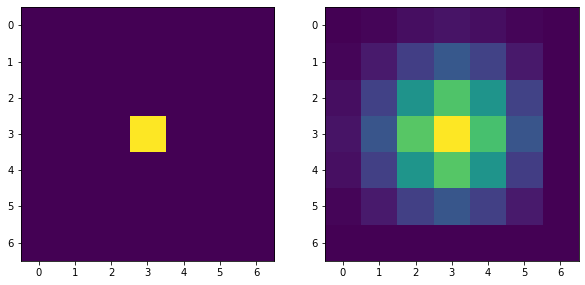

In [80]:
index = 65
print(dict_pix.keys())

fig, axs = plt.subplots(1,2,figsize = [10,9])
axs[0].imshow(dict_pix['0'])
axs[1].imshow(dict_pix['65'])

12


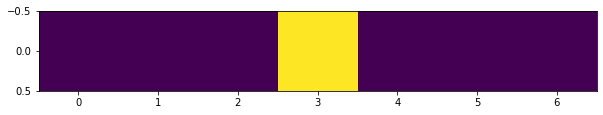

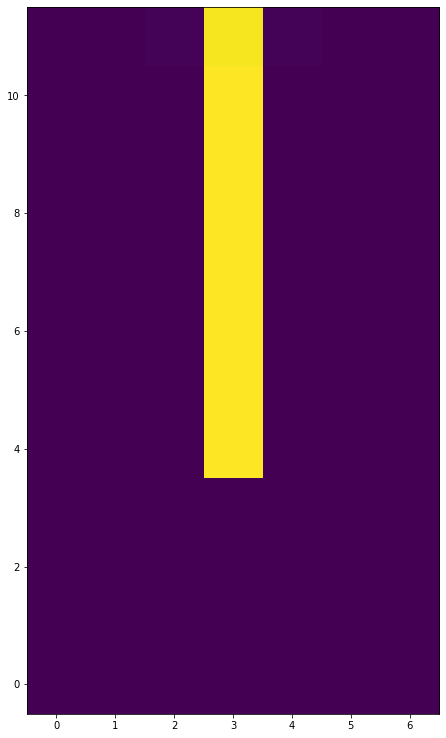

In [119]:
list_image_muon = [ ]
# print(len(list_pixels_matrix[0]))
list_keys = list(dict_pix.keys())
# print(type(list_keys[0]))

rows_gauss = np.vsplit(dict_pix[list_keys[0]],len(dict_pix[list_keys[0]]))

fig, axs = plt.subplots(figsize = [10,9])
axs.imshow(rows_gauss[3])

initial_row = [[0, 0,  0,  0,  0, 0, 0]]
list_image_muon.append(initial_row)

n_pixel = [1]
m_row = 1

for index in np.arange(0, len(list_keys)):
    # rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]][0]))

    # for index_row in np.arange(0, m_row):
    #     list_image_muon.append(rows_gauss[index_row])
    #     m_row = m_row + 1
    
    if index == 0:
        # print(index)
        rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]][0]))

        rows_gauss_next_1 = np.vsplit(dict_pix[list_keys[index + 1]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_2 = np.vsplit(dict_pix[list_keys[index + 2]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_3 = np.vsplit(dict_pix[list_keys[index + 3]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_4 = np.vsplit(dict_pix[list_keys[index + 4]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_5 = np.vsplit(dict_pix[list_keys[index + 5]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_6 = np.vsplit(dict_pix[list_keys[index + 6]],len(dict_pix[list_keys[index]][0]))

        list_image_muon.append(rows_gauss[0])
        list_image_muon.append(rows_gauss[1] + rows_gauss_next_1[0])
        list_image_muon.append(rows_gauss[2] + rows_gauss_next_1[1] + rows_gauss_next_2[0])
        list_image_muon.append(rows_gauss[3] + rows_gauss_next_1[2] + rows_gauss_next_2[1] + rows_gauss_next_3[0])
        list_image_muon.append(rows_gauss[4] + rows_gauss_next_1[3] + rows_gauss_next_2[2] + rows_gauss_next_3[1] + rows_gauss_next_4[0])
        list_image_muon.append(rows_gauss[5] + rows_gauss_next_1[4] + rows_gauss_next_2[3] + rows_gauss_next_3[2] + rows_gauss_next_4[1] + rows_gauss_next_5[0])
        list_image_muon.append(rows_gauss[6] + rows_gauss_next_1[5] + rows_gauss_next_2[4] + rows_gauss_next_3[3] + rows_gauss_next_4[2] + rows_gauss_next_5[1] + rows_gauss_next_6[0])

    # len(list_keys) - 6
    if 0 < index < 2 :
        # print(index)
        rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]][0]))

        rows_gauss_next_1 = np.vsplit(dict_pix[list_keys[index + 1]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_2 = np.vsplit(dict_pix[list_keys[index + 2]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_3 = np.vsplit(dict_pix[list_keys[index + 3]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_4 = np.vsplit(dict_pix[list_keys[index + 4]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_5 = np.vsplit(dict_pix[list_keys[index + 5]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_6 = np.vsplit(dict_pix[list_keys[index + 6]],len(dict_pix[list_keys[index]][0]))

        list_image_muon.append(rows_gauss[3] + rows_gauss_next_1[2] + rows_gauss_next_2[1] + rows_gauss_next_3[0])
        list_image_muon.append(rows_gauss[4] + rows_gauss_next_1[3] + rows_gauss_next_2[2] + rows_gauss_next_3[1] + rows_gauss_next_4[0])
        list_image_muon.append(rows_gauss[5] + rows_gauss_next_1[4] + rows_gauss_next_2[3] + rows_gauss_next_3[2] + rows_gauss_next_4[1] + rows_gauss_next_5[0])
        list_image_muon.append(rows_gauss[6] + rows_gauss_next_1[5] + rows_gauss_next_2[4] + rows_gauss_next_3[3] + rows_gauss_next_4[2] + rows_gauss_next_5[1] + rows_gauss_next_6[0])

        # list_image_muon.append(rows_gauss_next[0])
        # list_image_muon.append(rows_gauss_next[1])
        # list_image_muon.append(rows_gauss_next[2])
        # list_image_muon.append(rows_gauss_next[3])
        # list_image_muon.append(rows_gauss_next[4])
        # list_image_muon.append(rows_gauss_next[5])
        # list_image_muon.append(rows_gauss_next[6])
        # list_image_muon.append(rows_gauss[7])
    #     contribution_1 = rows_gauss[3]
    #     contribution_2 = rows_gauss[4]

    # elif index == 1:
    #     list_image_muon.append(rows_gauss[2] + contribution_1)
    #     contribution_1 = rows_gauss[3] + contribution_2
    #     contribution_2 = rows_gauss[4]

    # elif 1 < index < len(list_gaussians) - 1:
    #     list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
    #     contribution_1 = rows_gauss[3] + contribution_2
    #     contribution_2 = rows_gauss[4]

    # elif index == len(list_gaussians) - 1 :
    #     list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
    #     list_image_muon.append(rows_gauss[3] + contribution_2)
    #     list_image_muon.append(rows_gauss[4])
    #     # list_image_muon.append(rows_gauss[5])

# final_row = [[0, 0,  0,  0,  0, 0, 0]]
# list_image_muon.append(final_row)

print(len(list_image_muon))
imagen = np.concatenate(list_image_muon, axis = 0)
# Zeros = np.zeros([int(np.around(delta_XY_px,0)), anchura_max])
# print(Zeros.shape)
# x, y = np.meshgrid(i, j)
# plt.imshow(Zeros)
# imagen = np.concatenate((Gaussian_1, Gaussian_2), axis = 0)

fig, axs = plt.subplots(figsize=[8, 13])
x1 = axs.imshow(imagen, origin = 'lower')#, vmin=0, vmax=charge_per_line/10)
# fig.colorbar(x1)
plt.show()

In [122]:
for index in np.arange(0, len(list_keys)):
    rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]]))

    # rows_gauss_2 = np.vsplit(list_gaussians[1],5)
    # rows_gauss_3 = np.vsplit(list_gaussians[2],5)
    # rows_gauss_4 = np.vsplit(list_gaussians[3],5)
    # print(rows_gauss[2])
    if index == 0:
        rows_gauss_next = np.vsplit(dict_pix[list_keys[index + 1]],len(dict_pix[list_keys[index + 1]]))

        list_image_muon.append(rows_gauss[3] + rows_gauss_next[1])
        contribution_1 = rows_gauss[3]
        contribution_2 = rows_gauss[4]

    elif index == 1:
        list_image_muon.append(rows_gauss[2] + contribution_1)
        contribution_1 = rows_gauss[3] + contribution_2
        contribution_2 = rows_gauss[4]

    elif 1 < index < len(list_keys) - 1:
        list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
        contribution_1 = rows_gauss[3] + contribution_2
        contribution_2 = rows_gauss[4]

    elif index ==len(list_keys) - 1 :
        list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
        list_image_muon.append(rows_gauss[3] + contribution_2)
        list_image_muon.append(rows_gauss[4])
        # list_image_muon.append(rows_gauss[5])

final_row = [[0, 0,  0,  0,  0, 0, 0]]
list_image_muon.append(final_row)

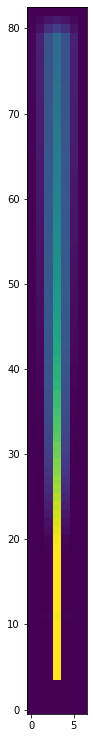

In [125]:
imagen = np.concatenate(list_image_muon, axis = 0)
# Zeros = np.zeros([int(np.around(delta_XY_px,0)), anchura_max])
# print(Zeros.shape)
# x, y = np.meshgrid(i, j)
# plt.imshow(Zeros)
# imagen = np.concatenate((Gaussian_1, Gaussian_2), axis = 0)

fig, axs = plt.subplots(figsize=[8, 13])
x1 = axs.imshow(imagen, origin = 'lower')
# fig.colorbar(x1)
plt.show()

In [71]:
data_x = scipy.stats.norm.rvs(size=200000, loc=0, scale = sigma)
data_y = scipy.stats.norm.rvs(size=200000, loc=0, scale = sigma) 

np.meshgrid(data_x, data_y)

MemoryError: Unable to allocate 298. GiB for an array with shape (200000, 200000) and data type float64

In [69]:
discrete = scipy.stats.rv_discrete(a = -7, b = 7)
print(discrete)